<a href="https://colab.research.google.com/github/Yadav-Roshan/NLP/blob/main/Med_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Medical Text Classifier**

### Dr. Santosh Chapaneri
### Sr. Data Scientist, Wolters Kluwer

### IEEE SPS Seasonal School

July 2023

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
# Read the dataset
df = pd.read_csv('/content/drive/MyDrive/SEM 5/NLP/Guest_Session/med_data.csv')
df.head()

,Unnamed: 0,description,medical_specialty,sample_name,transcription,keywords
0,0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller..."
1,1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh..."
2,2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart..."
3,3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo..."


In [ ]:
# Check for any nulls
df['transcription'].isnull().sum()

33

In [ ]:
# fill the transcription blanks with the description column
df['transcription'].fillna(df.description, inplace = True)

In [ ]:
# Check for any nulls
df['transcription'].isnull().sum()

0

In [ ]:
# How many different specialties
len(df['medical_specialty'].unique())

40

In [ ]:
# frequency of each specialty
df['medical_specialty'].value_counts()

 Surgery                          1103
 Consult - History and Phy.        516
 Cardiovascular / Pulmonary        372
 Orthopedic                        355
 Radiology                         273
 General Medicine                  259
 Gastroenterology                  230
 Neurology                         223
 SOAP / Chart / Progress Notes     166
 Obstetrics / Gynecology           160
 Urology                           158
 Discharge Summary                 108
 ENT - Otolaryngology               98
 Neurosurgery                       94
 Hematology - Oncology              90
 Ophthalmology                      83
 Nephrology                         81
 Emergency Room Reports             75
 Pediatrics - Neonatal              70
 Pain Management                    62
 Psychiatry / Psychology            53
 Office Notes                       51
 Podiatry                           47
 Dermatology                        29
 Cosmetic / Plastic Surgery         27
 Dentistry               

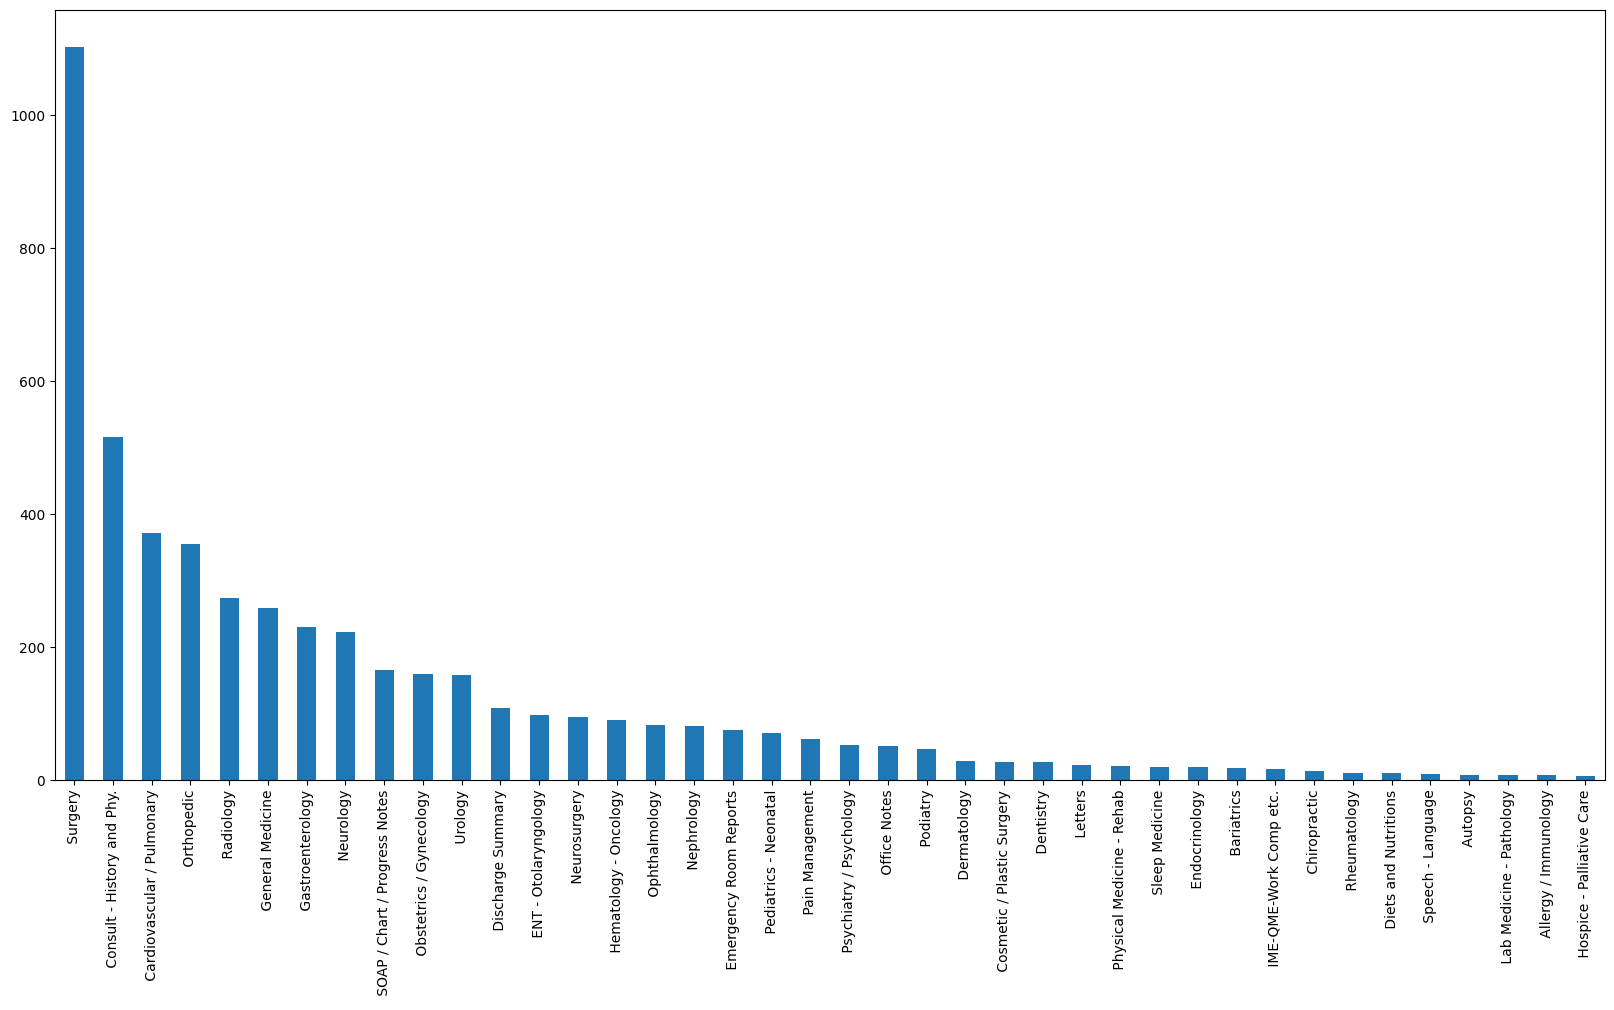

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot of medical_specialty

df['medical_specialty'].value_counts()[:40].plot(kind = 'bar', figsize=(20,10), fontsize=10);

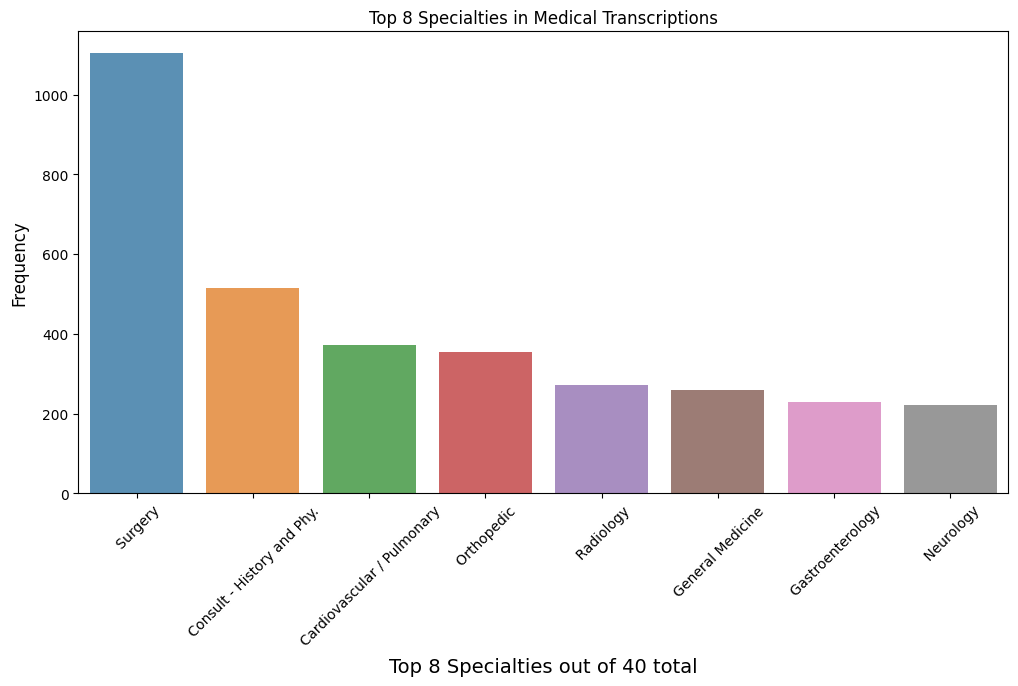

In [ ]:
# Display the top specialties most frequently repeated in the text

fig, ax = plt.subplots(figsize = (12,6)) # set size of figure
specialty = df['medical_specialty'].value_counts()
# top 8 specialities
specialty = specialty[:8]
# bar plot
g = sns.barplot(x = specialty.index, y = specialty.values, alpha=0.8)

plt.title("Top 8 Specialties in Medical Transcriptions")
plt.ylabel("Frequency", fontsize=12)
plt.xlabel("Top 8 Specialties out of 40 total", fontsize=14)

g.set_xticklabels(g.get_xticklabels(), rotation=45)
plt.show();

## **Class mapping**


In [ ]:
feature = 'medical_specialty'

In [ ]:
# df[feature] = df[feature].apply(lambda x: x.strip())

In [ ]:
df[feature].unique()

array([' Allergy / Immunology', ' Bariatrics',
       ' Cardiovascular / Pulmonary', ' Neurology', ' Dentistry',
       ' Urology', ' General Medicine', ' Surgery', ' Speech - Language',
       ' SOAP / Chart / Progress Notes', ' Sleep Medicine',
       ' Rheumatology', ' Radiology', ' Psychiatry / Psychology',
       ' Podiatry', ' Physical Medicine - Rehab',
       ' Pediatrics - Neonatal', ' Pain Management', ' Orthopedic',
       ' Ophthalmology', ' Office Notes', ' Obstetrics / Gynecology',
       ' Neurosurgery', ' Nephrology', ' Letters',
       ' Lab Medicine - Pathology', ' IME-QME-Work Comp etc.',
       ' Hospice - Palliative Care', ' Hematology - Oncology',
       ' Gastroenterology', ' ENT - Otolaryngology', ' Endocrinology',
       ' Emergency Room Reports', ' Discharge Summary',
       ' Diets and Nutritions', ' Dermatology',
       ' Cosmetic / Plastic Surgery', ' Consult - History and Phy.',
       ' Chiropractic', ' Autopsy'], dtype=object)

In [ ]:
# new_class = "Anesthesiology"
# df[feature] = df[feature].apply(lambda x: new_class if x in ['Hospice - Palliative Care','Pain Management','Endocrinology','Gastroenterology','Hematology - Oncology','Nephrology','Cardiovascular / Pulmonary'] else x)

In [ ]:
print("Reduced",feature,"to",len(df[feature].unique()),"total classes")

Reduced medical_specialty to 40 total classes


In [ ]:
# renaming specialties under Anesthesiology and Internal Medicine
new_class = 'Anesthesiology'
#old_classes = ['Hospice - Palliative Care','Pain Management','Endocrinology','Gastroenterology','Hematology - Oncology','Nephrology','Cardiovascular / Pulmonary']


#for index, old_label in df[feature].iteritems():
  #for old_class in old_classes:
    #if old_label == old_class:
      #df[feature][index] = new_class

# Grouping all anesthesiology specialties
df[feature].mask(df[feature] == ' Hospice - Palliative Care', new_class, inplace=True)
df[feature].mask(df[feature] == ' Pain Management', new_class, inplace=True)
df[feature].mask(df[feature] == ' Sleep Medicine', new_class, inplace=True)
df[feature].mask(df[feature] == ' Endocrinology', new_class, inplace=True)
df[feature].mask(df[feature] == ' Gastroenterology', new_class, inplace=True)
df[feature].mask(df[feature] == ' Hematology - Oncology', new_class, inplace=True)
df[feature].mask(df[feature] == ' Nephrology', new_class, inplace=True)
df[feature].mask(df[feature] == ' Rheumatology', new_class, inplace=True)
df[feature].mask(df[feature] == ' Cardiovascular / Pulmonary', new_class, inplace=True)

print("Reduced",feature,"to",len(df[feature].unique()),"total classes")

Reduced medical_specialty to 32 total classes


In [ ]:
new_class = 'Surgery_Specialty'

# Grouping all surgery specialties
df[feature].mask(df[feature] == ' Surgery', new_class, inplace=True)
df[feature].mask(df[feature] == ' Cosmetic / Plastic Surgery', new_class, inplace=True)
df[feature].mask(df[feature] == ' Neurosurgery', new_class, inplace=True)
df[feature].mask(df[feature] == ' ENT - Otolaryngology', new_class, inplace=True)
df[feature].mask(df[feature] == ' Obstetrics / Gynecology', new_class, inplace=True)
df[feature].mask(df[feature] == ' Urology', new_class, inplace=True)

print("Reduced",feature,"to",len(df[feature].unique()),"total classes")

Reduced medical_specialty to 27 total classes


In [ ]:
new_class = 'Documents'

# Grouping all documents
df[feature].mask(df[feature] == ' Consult - History and Phy.', new_class, inplace=True)
df[feature].mask(df[feature] == ' Discharge Summary', new_class, inplace=True)
df[feature].mask(df[feature] == ' Emergency Room Reports', new_class, inplace=True)
df[feature].mask(df[feature] == ' IME-QME-Work Comp etc.', new_class, inplace=True)
df[feature].mask(df[feature] == ' Letters', new_class, inplace=True)
df[feature].mask(df[feature] == ' Office Notes', new_class, inplace=True)
df[feature].mask(df[feature] == ' SOAP / Chart / Progress Notes', new_class, inplace=True)
df[feature].mask(df[feature] == ' Radiology', new_class, inplace=True)

print("Reduced",feature,"to",len(df[feature].unique()),"total classes")

Reduced medical_specialty to 20 total classes


In [ ]:
new_class = 'Other_Specialities'

# Grouping less popular specialties and specialties with the least data points
df[feature].mask(df[feature] == ' Diets and Nutritions', new_class, inplace=True)
df[feature].mask(df[feature] == ' Bariatrics', new_class, inplace=True)
df[feature].mask(df[feature] == ' Dentistry', new_class, inplace=True)
df[feature].mask(df[feature] == ' Ophthalmology', new_class, inplace=True)
df[feature].mask(df[feature] == ' Pediatrics - Neonatal', new_class, inplace=True)
df[feature].mask(df[feature] == ' Dermatology', new_class, inplace=True)
df[feature].mask(df[feature] == ' Allergy / Immunology', new_class, inplace=True)
df[feature].mask(df[feature] == ' Speech - Language', new_class, inplace=True)
df[feature].mask(df[feature] == ' Psychiatry / Psychology', new_class, inplace=True)
df[feature].mask(df[feature] == ' Autopsy', new_class, inplace=True)
df[feature].mask(df[feature] == ' Lab Medicine - Pathology', new_class, inplace=True)
df[feature].mask(df[feature] == ' Physical Medicine - Rehab', new_class, inplace=True)
df[feature].mask(df[feature] == ' Orthopedic', new_class, inplace=True)
df[feature].mask(df[feature] == ' Chiropractic', new_class, inplace=True)
df[feature].mask(df[feature] == ' Podiatry', new_class, inplace=True)
df[feature].mask(df[feature] == ' Neurology', new_class, inplace=True)

print("Reduced",feature,"to",len(df[feature].unique()),"total classes")

Reduced medical_specialty to 5 total classes


In [ ]:
# General medicine is also known as Internal Medicine
df[feature].mask(df[feature] == ' General Medicine', 'Internal_Medicine', inplace=True)

In [ ]:
# Double checking what the classes are
df['medical_specialty'].value_counts()

Surgery_Specialty     1640
Documents             1228
Other_Specialities     982
Anesthesiology         890
Internal_Medicine      259
Name: medical_specialty, dtype: int64

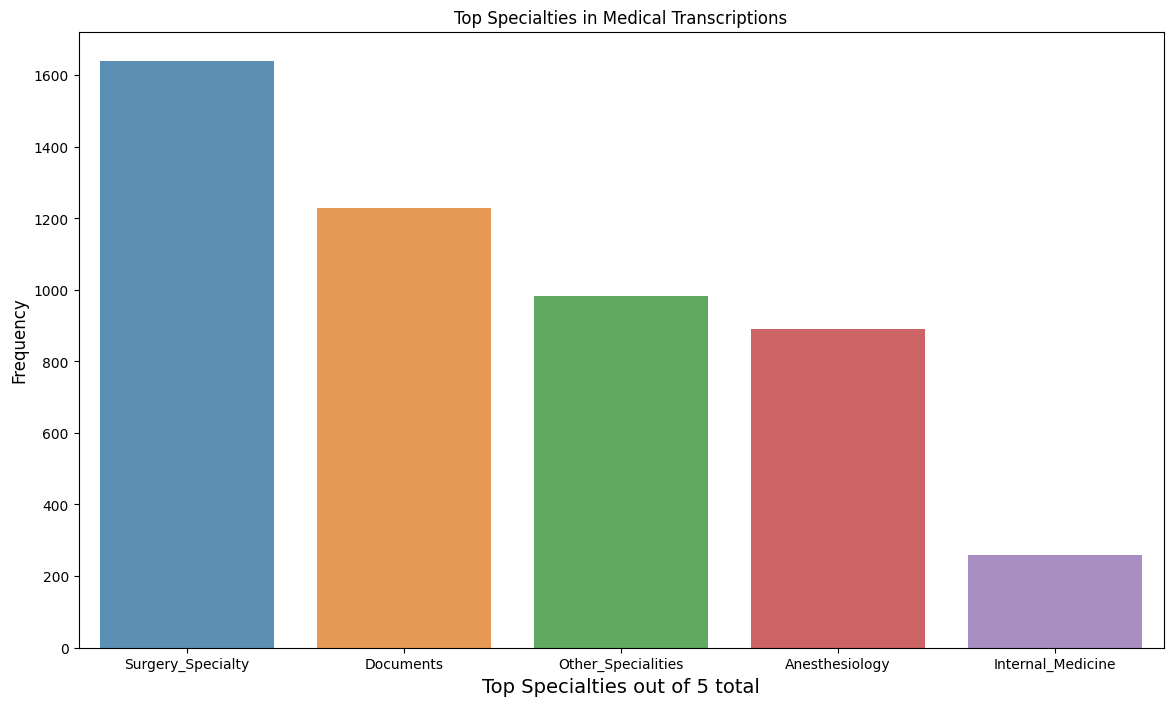

In [ ]:
# Display the consolidated 4 specialties most frequently repeated in the text
fig, ax = plt.subplots(figsize = (14,8)) # set size of figure
specialty = df['medical_specialty'].value_counts()
specialty = specialty[::,]
g = sns.barplot(x=specialty.index, y=specialty.values, alpha=0.8)

# Calculate total classes
total = str(len(df['medical_specialty'].unique()))
plt.title("Top Specialties in Medical Transcriptions")
plt.ylabel("Frequency", fontsize=12)

x_label_str = "Top Specialties out of " + total +" total"
plt.xlabel(x_label_str, fontsize=14)

g.set_xticklabels(g.get_xticklabels(), rotation=0)

plt.show()

In [ ]:
# Sorting the labels

values = [3,2,4,1,5]
keys = sorted(df['medical_specialty'].unique())
zipObj = zip(keys,values)
classes_dict = dict(zipObj)
#classes_dict = dict(None)
classes_dict

{'Anesthesiology': 3,
 'Documents': 2,
 'Internal_Medicine': 4,
 'Other_Specialities': 1,
 'Surgery_Specialty': 5}

In [ ]:
sorted_classes_dict = {k: v for k, v in sorted(classes_dict.items(), key=lambda item: item[1])}

In [ ]:
list(sorted_classes_dict.keys())

['Other_Specialities',
 'Documents',
 'Anesthesiology',
 'Internal_Medicine',
 'Surgery_Specialty']

# **Text processing**

In [ ]:
import numpy as np
df.shape

(4999, 6)

In [ ]:
print('Sample Transcription 1:\n'+df.iloc[5]['transcription']+'\n')
print('Sample Transcription 2:\n'+df.iloc[125]['transcription']+'\n')
print('Sample Transcription 3:\n'+df.iloc[1000]['transcription'])

Sample Transcription 1:
PREOPERATIVE DIAGNOSIS: , Morbid obesity.,POSTOPERATIVE DIAGNOSIS:  ,Morbid obesity.,PROCEDURE: , Laparoscopic antecolic antegastric Roux-en-Y gastric bypass with EEA anastomosis.,ANESTHESIA: , General with endotracheal intubation.,INDICATION FOR PROCEDURE: , This is a 30-year-old female, who has been overweight for many years.  She has tried many different diets, but is unsuccessful.  She has been to our Bariatric Surgery Seminar, received some handouts, and signed the consent.  The risks and benefits of the procedure have been explained to the patient.,PROCEDURE IN DETAIL:  ,The patient was taken to the operating room and placed supine on the operating room table.  All pressure points were carefully padded.  She was given general anesthesia with endotracheal intubation.  SCD stockings were placed on both legs.  Foley catheter was placed for bladder decompression.  The abdomen was then prepped and draped in standard sterile surgical fashion.  Marcaine was then 

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
import re
import string

# Cleaning of text data
def clean_text(text):
    # remove punctuations
    text = ''.join(word for word in text if word not in string.punctuation)
    #text = text.translate(str.maketrans('', '', string.punctuation))
    # remove digits
    text1 = ''.join(w.lower() for w in text if not w.isdigit())
    # lower case
    #text2 = text1.lower()
    # remove escape characters
    #REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
    # replace REPLACE_BY_SPACE_RE symbols by space in text
    #text2 = REPLACE_BY_SPACE_RE.sub(' ',text1)
    return text1

In [ ]:
# Lemmatization of text data
def lemmatize_text(text):
    wordlist = []
    lemmatizer = WordNetLemmatizer()
    # Sentence tokenization
    sentences = nltk.sent_tokenize(str(text))

    intial_sentences = sentences[0:1]
    final_sentences = sentences[len(sentences)-2: len(sentences)-1]

    # Word tokenization
    for sentence in intial_sentences:
        words = nltk.word_tokenize(sentence)
        for word in words:
            wordlist.append(word)

    for sentence in final_sentences:
        words = nltk.word_tokenize(sentence)
        for word in words:
            wordlist.append(word)

    return wordlist

In [ ]:
# Apply the functions on transcription column

# Clean
df['transcript'] = df['transcription'].apply(lambda x: clean_text(x))
# Lemmatize
df['transcript'] = df['transcript'].apply(lambda x: lemmatize_text(x))

In [ ]:
print('Sample Transcription 1:\n'+str(df.iloc[5]['transcript'])+'\n')
print('Sample Transcription 2:\n'+str(df.iloc[125]['transcript'])+'\n')
print('Sample Transcription 3:\n'+str(df.iloc[1000]['transcript']))

Sample Transcription 1:
['preoperative', 'diagnosis', 'morbid', 'obesitypostoperative', 'diagnosis', 'morbid', 'obesityprocedure', 'laparoscopic', 'antecolic', 'antegastric', 'rouxeny', 'gastric', 'bypass', 'with', 'eea', 'anastomosisanesthesia', 'general', 'with', 'endotracheal', 'intubationindication', 'for', 'procedure', 'this', 'is', 'a', 'yearold', 'female', 'who', 'has', 'been', 'overweight', 'for', 'many', 'years', 'she', 'has', 'tried', 'many', 'different', 'diets', 'but', 'is', 'unsuccessful', 'she', 'has', 'been', 'to', 'our', 'bariatric', 'surgery', 'seminar', 'received', 'some', 'handouts', 'and', 'signed', 'the', 'consent', 'the', 'risks', 'and', 'benefits', 'of', 'the', 'procedure', 'have', 'been', 'explained', 'to', 'the', 'patientprocedure', 'in', 'detail', 'the', 'patient', 'was', 'taken', 'to', 'the', 'operating', 'room', 'and', 'placed', 'supine', 'on', 'the', 'operating', 'room', 'table', 'all', 'pressure', 'points', 'were', 'carefully', 'padded', 'she', 'was', 'giv

# Medical Text Classification

**Goal**: Correctly classify the medical specialty based on the transcription text

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
# Text to TFIDF values
vectorizer = TfidfVectorizer(analyzer='word', stop_words='english',
                             ngram_range=(1,3), max_df=0.75,
                             min_df=5, use_idf=True,
                             smooth_idf=True,max_features=5000)

# Fit and transform
tfIdfMat  = vectorizer.fit_transform(" ".join(x) for x in df.transcript)

# Feature names
feature_names = vectorizer.get_feature_names_out()
print(feature_names)

['abc' 'abcd' 'abcd general' ... 'yo' 'yo rhf' 'young']


In [ ]:
# How many features?
len(feature_names)

5000

In [ ]:
# Apply PCA
#pca = PCA(n_components=2)

#tfIdfMat_reduced = pca.fit_transform(tfIdfMat.toarray())

labels = df['medical_specialty']
print(labels.unique())
category_list = [classes_dict[label] for label in labels]

['Other_Specialities' 'Anesthesiology' 'Surgery_Specialty'
 'Internal_Medicine' 'Documents']


In [ ]:
category_list[4500:4510]

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2]

In [ ]:
# Train-test split of the reduced data
X_train, X_test, y_train, y_test = train_test_split(tfIdfMat,
                                                    category_list,
                                                    stratify=category_list,
                                                    random_state=1)

In [ ]:
print('Train_Set_Size:'+str(X_train.shape))
print('Test_Set_Size:'+str(X_test.shape))

Train_Set_Size:(3749, 5000)
Test_Set_Size:(1250, 5000)


In [ ]:
# Classifier
clf = LogisticRegression(penalty= 'elasticnet', solver= 'saga',
                         l1_ratio=0.5, random_state=1).fit(X_train,y_train)

y_pred = clf.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
# Performance measure
from sklearn.metrics import confusion_matrix,classification_report

cm = confusion_matrix(y_pred, y_test)

print(classification_report(y_test,
                            y_pred,
                            target_names=list(sorted_classes_dict.keys()),
                            zero_division=0))

                    precision    recall  f1-score   support

Other_Specialities       0.41      0.27      0.33       246
         Documents       0.44      0.67      0.53       307
    Anesthesiology       0.33      0.21      0.26       222
 Internal_Medicine       0.00      0.00      0.00        65
 Surgery_Specialty       0.63      0.73      0.67       410

          accuracy                           0.49      1250
         macro avg       0.36      0.37      0.36      1250
      weighted avg       0.45      0.49      0.46      1250



In [ ]:
from sklearn.svm import SVC
svc = SVC(kernel = "rbf", gamma = 0.5)